In [1]:
from scipy.stats import linregress
from scipy.stats import t
import numpy as np

def DamaPlot(x,y, ax = None):
    tiese = linregress(x, y)
    
    if ax == None:
        fig, ax = plt.subplots(1,1,figsize = (5,5))
    
    N = len(x)
    # Vizualizacija naudojant sklaidos diagramą
    ax.scatter(x,y,edgecolor='black')

    # Pridedame linijinės regresijos tiesę
    X = np.linspace(min(x), max(x), 100)  # Sukuriamas X diapazonas nuo mažiausios iki didžiausios a reikšmės
    Y = X*tiese.slope + tiese.intercept
    
    ax.plot(X, Y, 'r--', alpha=0.7, label=f'tiesinė regresija (r = {tiese.rvalue:.2f},\
    p = {tiese.pvalue:.2g})\n\
    $\Delta$ = {tiese.slope:4.0f} +- {tiese.stderr:3.1f} '+r'$\frac{įstatymai}{metai}$'+\
           f"")
    
    ax.legend();
    return tiese

    

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data.csv')
df.dropna(inplace=True) #ismeskim 2024 nes nera duomenu ten


#na cia visos vertes
metai = df['metai']
įstatymai = df['?statymai']
galioja = df['Galioja']
negalioja = df['NEGALIOJA']

laiku = [įstatymai, galioja, negalioja]

# o čia kumuliantai, tai yra sudėtos vertės, nes gi jų tik daugėja
visi_įstatymai = np.cumsum(įstatymai)
visi_galiojantys = np.cumsum(galioja)
visi_negaliojantys = np.cumsum(negalioja)




#
df_uk = pd.read_csv('uk_data.csv')


metai_uk = np.array(df_uk['year'],dtype = np.int16)
įstatymai_uk = np.array(df_uk['count'],dtype = np.int16)
#
visi_įstatymai_uk = np.cumsum(įstatymai_uk)

#hipotezuoju, jog turetu uzsilenkti, bet matau jau is akies kad lenkiasi i kvadrata,
#o ne i sakni, kaip butu man logiska


#
df_vargelis= pd.read_csv('vargelis.csv')

#anglijos populiacija
df_populiacija = pd.read_csv('uk_populiation.csv') #https://ourworldindata.org/grapher/population-of-england-millennium

metai_pop = df_populiacija['Year']
uk_pop    = df_populiacija['Population']



Teisėkūra
---------------





Danielius Kundrotas

**Turinys**

- Lietuva

- Anglija

- Lietuva vs Anglija

- Jei lieka laiko
    - Spekuliacijos
    - Duomenų rinkimas
    - DI reguliavimo aktas

Motyvacija
------------

 - „I NEED THAT PICTURE OF JE-SUS“ - TMH

Lietuvos teisiniai dokumentai
------------------------


**rezultatai ieškant „“**:

- 421318 = 421k įstatyminių dokumentų:
    - 14k įstatymų
    - 150k įsakymų
    - 88k Sprendimas
- viso 69 skirtingos dokumentėlių rūšys
    
    


Visi teisiniai dokumentėliai per pastaruosius 36 metus:


    Įsakymas 	147554
    Sprendimas 	87907
    Nutartis 	65006
    Nutarimas 	63773
    Potvarkis 	17942
    Įstatymas 	13921
    Dekretas 	11270
    Informacija 	4041
    Pranešimas 	2866
    Atitaisymas 	1368
    Nutartis dėl teismingumo 	1242
    Rezoliucija 	984
    Protokolas 	620
    Susitarimas 	564
    Raštas 	452
    Sutartis 	400
    Konvencija 	294
    Aktas 	231
    Tarptautinio dokumento protokolas 	147
    Statutas 	144
    Įsakas 	95
    Pareiškimas 	88
    Kreipimasis 	62
    Leidimas 	51
    Išaiškinimas 	40
    Apžvalga 	36
    Memorandumas 	32
    Deklaracija 	21
    Konstitucinis įstatymas 	17
    Išvada 	16
    Tvarka 	14
    Protokolinis nutarimas 	14
    Priedas 	14
    Kodeksas 	13
    Patikslinimas 	11
    Paaiškinimas 	11
    Nuostatai 	11
    Taisyklės 	10
    Protokolinis sprendimas 	8
    Išrašas 	8
    Instrukcija 	8
    Sąrašas 	7
    Reglamentas 	7
    Skelbimas 	6
    Įgaliojimas 	6
    Rekomendacija 	5
    Pataisa 	5
    Nota 	5
    Atskiroji nutartis 	5
    Konstitucija 	3
    Įstatai 	3
    Chartija 	3
    Protestas 	2
    Paktas 	2
    Nurodymas 	2
    Konsultacija 	2
    Komunikatas 	2
    Sutarties priedas 	1
    Restitucijos aktas 	1
    Raginimas 	1
    Pavedimas 	1
    Pasiūlymas 	1
    Normatyvai 	1
    Metodika 	1
    Laiškas 	1
    Konstitucinis aktas 	1
    Kiti 	1
    Įstatymo projektas 	1
    Gairės 	1

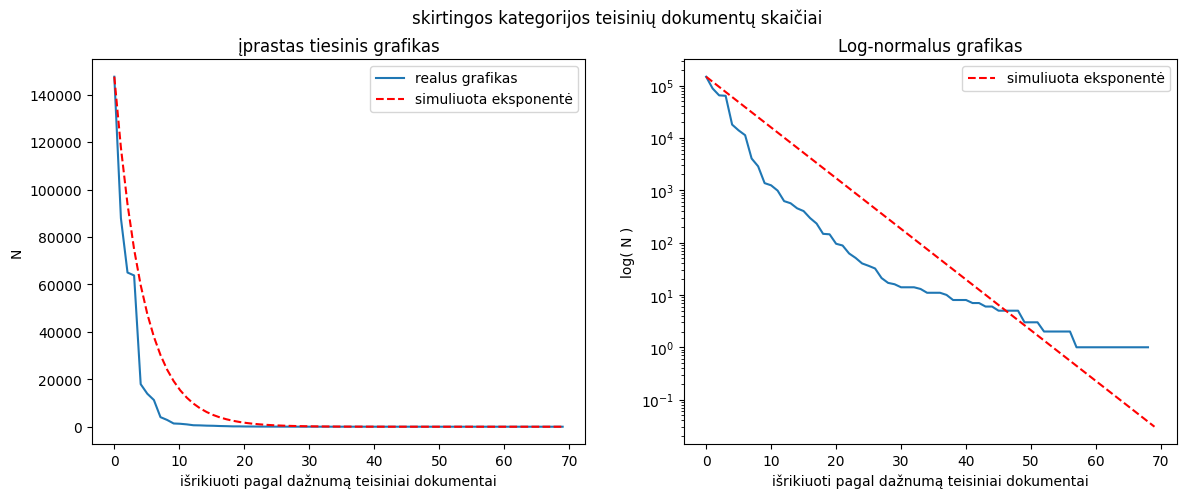

In [3]:
#
fig, [ax,ax2] = plt.subplots(1,2, figsize=(14,5))#, sharey=True)

fig.suptitle('skirtingos kategorijos teisinių dokumentų skaičiai');



y = df_vargelis['kiekis']
x = np.linspace(0, 69,69)

simuliuota_y =  ((0.8)**(x))*max(y)

ax.set_title("įprastas tiesinis grafikas")
ax.plot(x,y, label='realus grafikas')
ax.plot(x,simuliuota_y, 'r--', label='simuliuota eksponentė')

ax.set_ylabel('N')
ax.set_xlabel('išrikiuoti pagal dažnumą teisiniai dokumentai')
ax.legend();


ax2.set_title("Log-normalus grafikas")
ax2.plot(y)
ax2.plot(x,simuliuota_y, 'r--', label='simuliuota eksponentė')

ax2.set_ylabel('log( N )')
ax2.set_xlabel('išrikiuoti pagal dažnumą teisiniai dokumentai')
ax2.set_yscale('log');
ax2.legend();



tiese = linregress(x,y)
#print(tiese)

tiese = linregress(x,np.log(y))
#print(tiese);





Kaip turėtų atrodyti įstatymų skaičius nuo laiko?
--------


- limituotas žmogaus kognicija


- besikeičianti ir sudėtingėjanti visuomenė

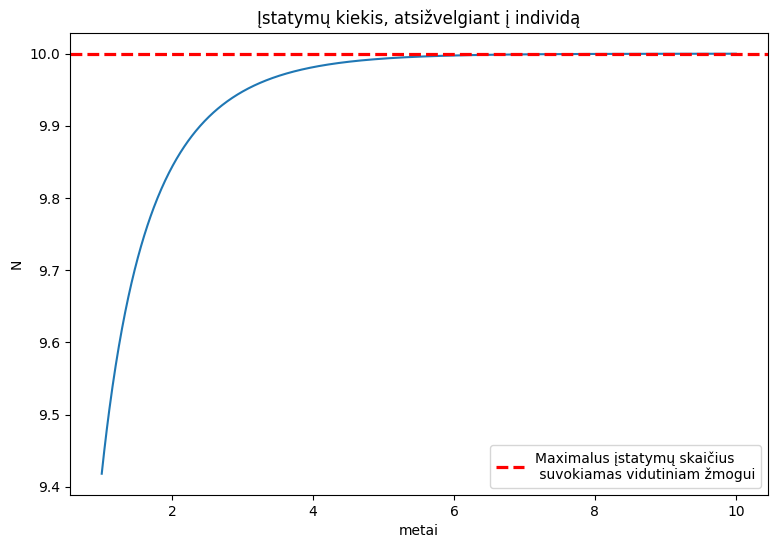

In [68]:
#
fig, ax = plt.subplots(figsize =(9,6))
#ax.scatter(metai, įstatymai)
x = np.linspace(1, 10,1000)


ax.plot(x,1/(1-np.exp(x))+10)

ax.set_ylabel('N')
ax.set_xlabel('metai')
ax.set_title('Įstatymų kiekis, atsižvelgiant į individą');

ax.axhline(10, color='red', alpha = 1,\
linestyle='dashed', linewidth=2.3, label='Maximalus įstatymų skaičius\n suvokiamas vidutiniam žmogui')
ax.legend();

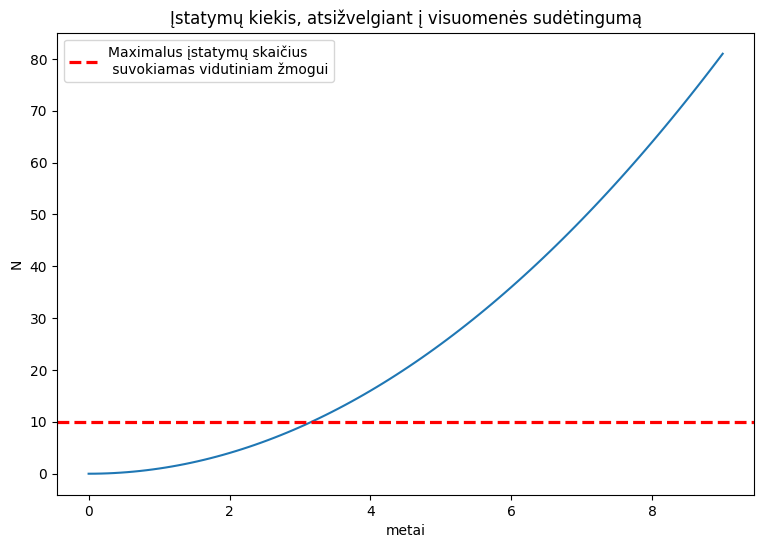

In [69]:
#
fig, ax = plt.subplots(figsize =(9,6))
#ax.scatter(metai, įstatymai)
x = np.linspace(0, 9,100)


plt.plot(x,x**2)

ax.set_ylabel('N')
ax.set_xlabel('metai')
ax.set_title('Įstatymų kiekis, atsižvelgiant į visuomenės sudėtingumą');

ax.axhline(10, color='red', alpha = 1,\
linestyle='dashed', linewidth=2.3, label='Maximalus įstatymų skaičius\n suvokiamas vidutiniam žmogui')
ax.legend();

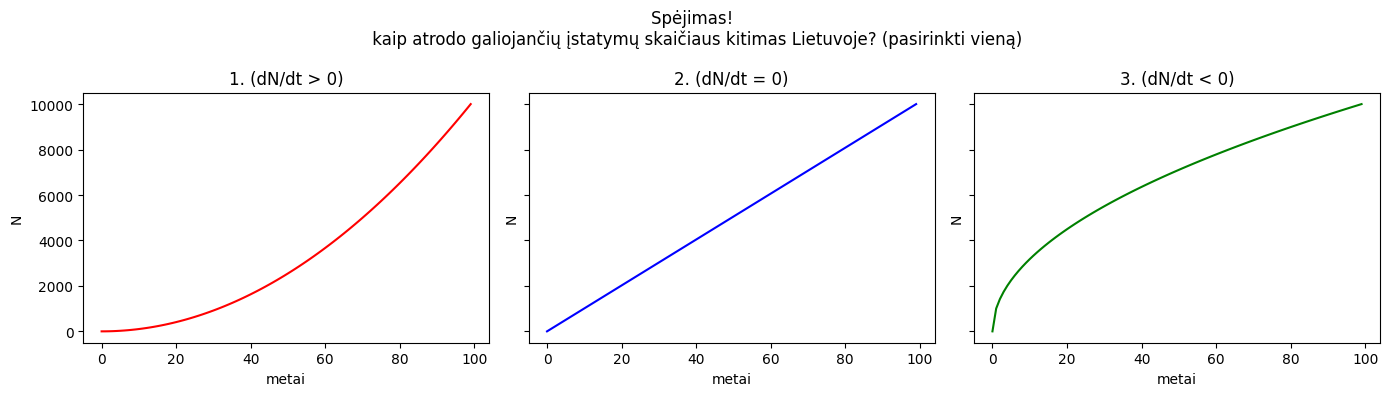

In [70]:
#
fig, [ax1,ax2, ax3] = plt.subplots(1,3, figsize=(14,4), sharey=True, layout='tight')

fig.suptitle('Spėjimas! \n kaip atrodo galiojančių įstatymų skaičiaus kitimas Lietuvoje? (pasirinkti vieną)');


x = np.linspace(0, 100,100)

ax1.set_title("1. (dN/dt > 0)")
ax1.set_ylabel('N')
ax1.set_xlabel('metai')
ax1.plot(x**2, 'r')


ax2.set_title("2. (dN/dt = 0)")
ax2.set_ylabel('N')
ax2.set_xlabel('metai')
ax2.plot(x*100, 'b')

ax3.set_title("3. (dN/dt < 0)")
ax3.set_ylabel('N')
ax3.set_xlabel('metai')
ax3.plot((x**0.5)*1000, 'g');


Realus įstatymų skaičius nuo laiko
------------

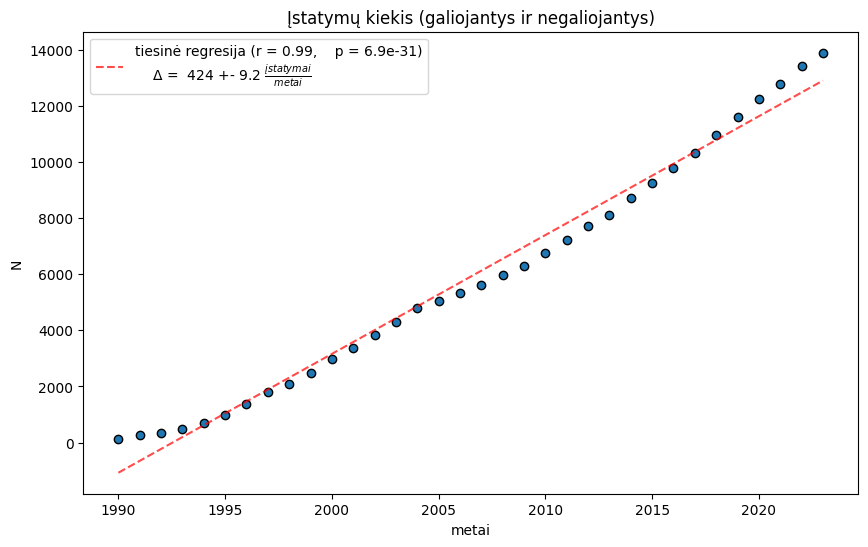

In [71]:
#
fig, ax = plt.subplots(figsize=(10,6))
#ax.scatter(metai, įstatymai)
DamaPlot(metai, visi_įstatymai, ax)
ax.set_ylabel('N')
ax.set_xlabel('metai')
ax.set_title('Įstatymų kiekis (galiojantys ir negaliojantys)');
ax.legend();

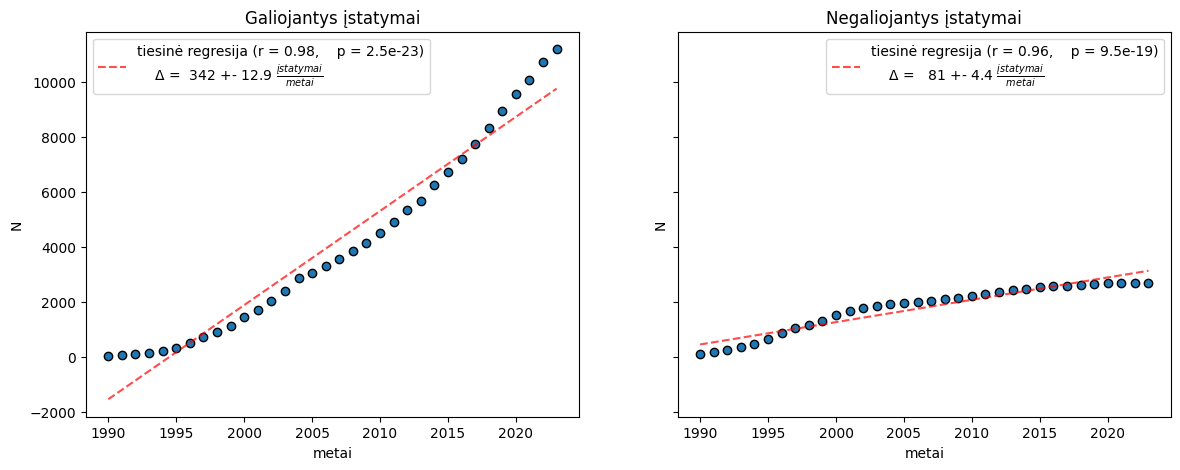

In [72]:
#
fig, ax = plt.subplots(1,2, figsize=(14,5), sharey=True)
DamaPlot(metai, visi_galiojantys, ax[0])
ax[0].set_ylabel('N')
ax[0].set_xlabel('metai')
ax[0].set_title('Galiojantys įstatymai');

DamaPlot(metai, visi_negaliojantys, ax[1])
ax[1].set_ylabel('N')
ax[1].set_xlabel('metai')
ax[1].set_title('Negaliojantys įstatymai');

ax[0].legend()
ax[1].legend();

Sparta
----

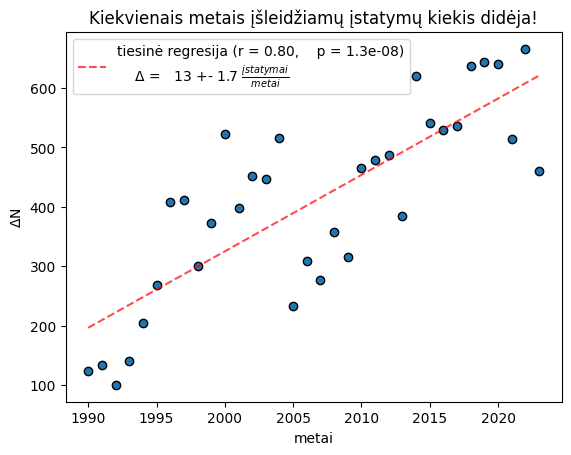

In [73]:
#
fig, ax = plt.subplots()
#ax.scatter(metai, įstatymai)
DamaPlot(metai, įstatymai, ax) # galioja 

ax.set_ylabel('$\Delta$N')
ax.set_xlabel('metai')
ax.set_title('Kiekvienais metais įšleidžiamų įstatymų kiekis didėja!');
ax.legend();

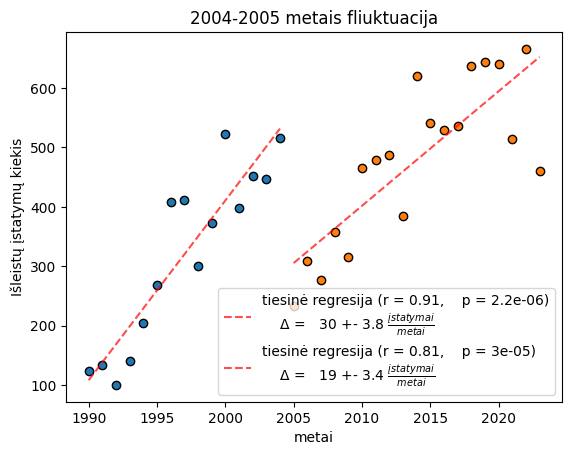

In [74]:
#
N = 15
fig, ax = plt.subplots()
#ax.scatter(metai, įstatymai)
DamaPlot(metai[:N], įstatymai[:N], ax)
ax.set_ylabel('Išleistų įstatymų kiekis')
ax.set_xlabel('metai')
ax.legend()


DamaPlot(metai[N:], įstatymai[N:], ax)
ax.set_title('2004-2005 metais fliuktuacija');
ax.legend()



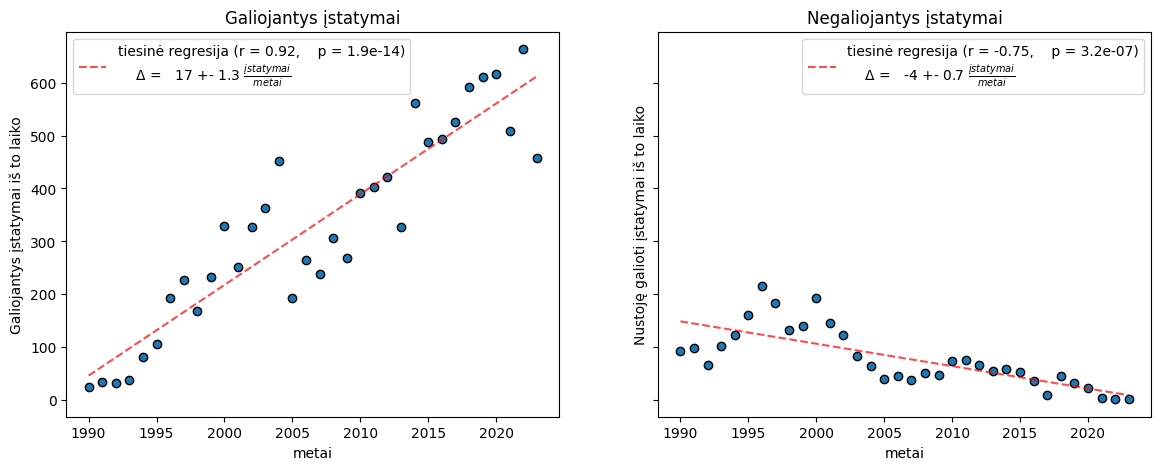

In [75]:
#
fig, ax = plt.subplots(1,2, figsize=(14,5), sharey=True)
DamaPlot(metai, galioja, ax[0])
ax[0].set_ylabel('Galiojantys įstatymai iš to laiko')
ax[0].set_xlabel('metai')
ax[0].set_title('Galiojantys įstatymai');

DamaPlot(metai, negalioja, ax[1])
ax[1].set_ylabel('Nustoję galioti įstatymai iš to laiko')
ax[1].set_xlabel('metai')
ax[1].set_title('Negaliojantys įstatymai');

ax[0].legend()
ax[1].legend();

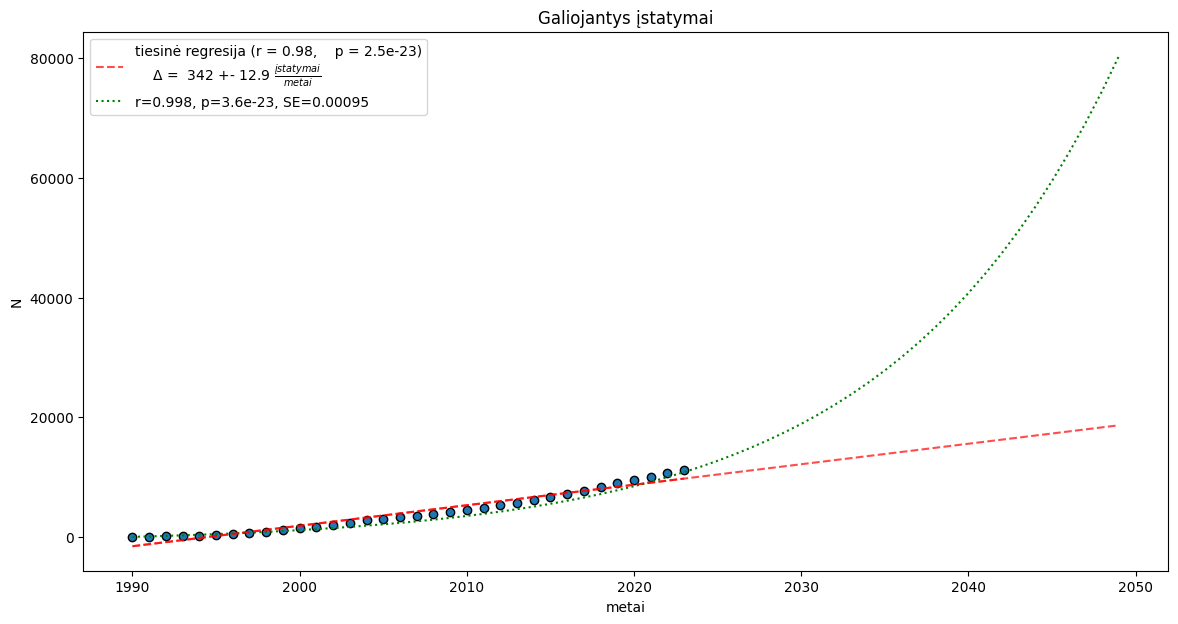

In [4]:
fig, ax = plt.subplots(1,1, figsize=(14,7), sharey=True)
tiese = DamaPlot(metai, visi_galiojantys, ax)
ax.set_ylabel('N')
ax.set_xlabel('metai')
ax.set_title('Galiojantys įstatymai');

metai2 = np.array([i for i in range(1990, 2050)])
ax.plot(metai2, (np.exp(-140.49533056450525)*np.exp(0.07408565201023358*metai2)-1000), 'g:',\
          label = "r=0.998, p=3.6e-23, SE=0.00095")

X = metai2
Y = X*tiese.slope + tiese.intercept
    
ax.plot(X, Y, 'r--', alpha=0.7)

ax.legend()

Anglija
-----

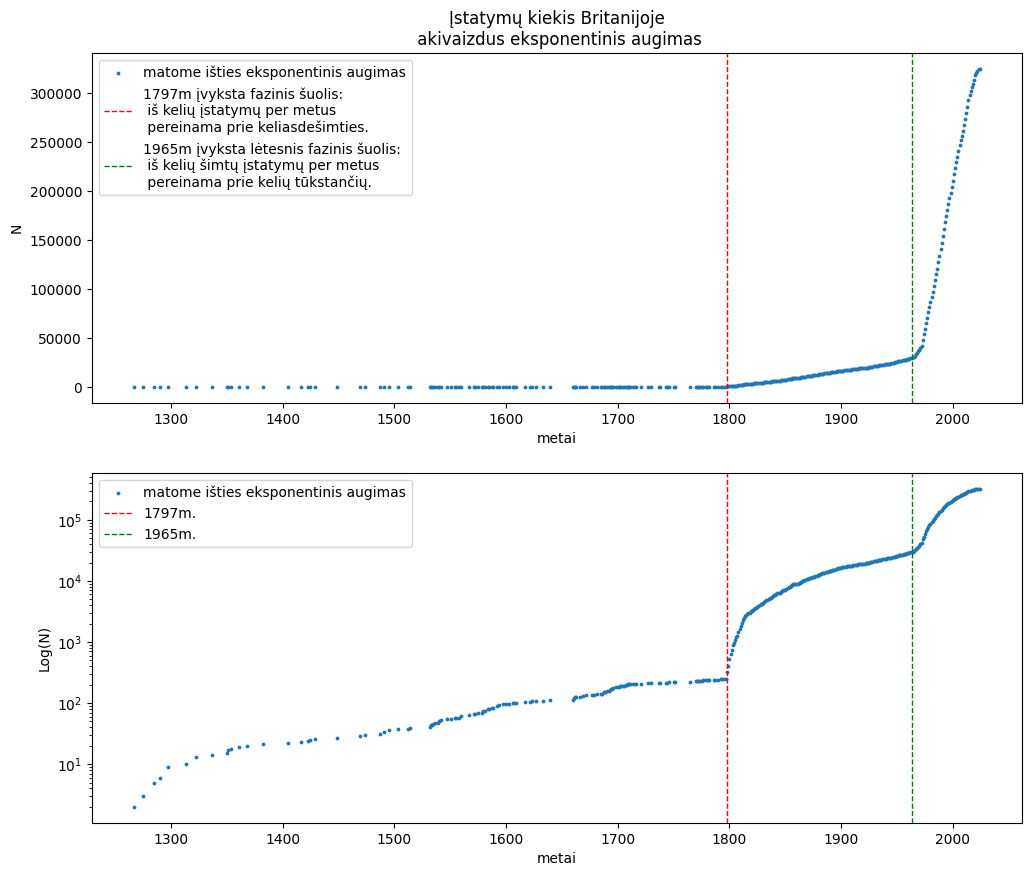

In [87]:
#
fig, [ax,ax2] = plt.subplots(2,1, figsize=(12,10))
#ax.scatter(metai, įstatymai)
ax.scatter(metai_uk, visi_įstatymai_uk, label='matome išties eksponentinis augimas', s = 3)
ax.set_ylabel('N')
ax.set_xlabel('metai')
ax.set_title('Įstatymų kiekis Britanijoje\n akivaizdus eksponentinis augimas');

ax.axvline(metai_uk[131], color='red',\
linestyle='dashed', linewidth=1,\
label = "1797m įvyksta fazinis šuolis:\n iš kelių įstatymų per metus\n pereinama prie keliasdešimties.")

ax.axvline(metai_uk[297], color='green',\
linestyle='dashed', linewidth=1,\
label = "1965m įvyksta lėtesnis fazinis šuolis:\n iš kelių šimtų įstatymų per metus\n pereinama prie kelių tūkstančių.")

ax.legend();



ax2.scatter(metai_uk, visi_įstatymai_uk, label='matome išties eksponentinis augimas', s = 3)
ax2.set_ylabel('Log(N)')
ax2.set_xlabel('metai')
ax2.set_yscale('log')

ax2.axvline(metai_uk[131], color='red',\
linestyle='dashed', linewidth=1,\
label = "1797m.")

ax2.axvline(metai_uk[297], color='green',\
linestyle='dashed', linewidth=1,\
label = "1965m.")


ax2.legend();

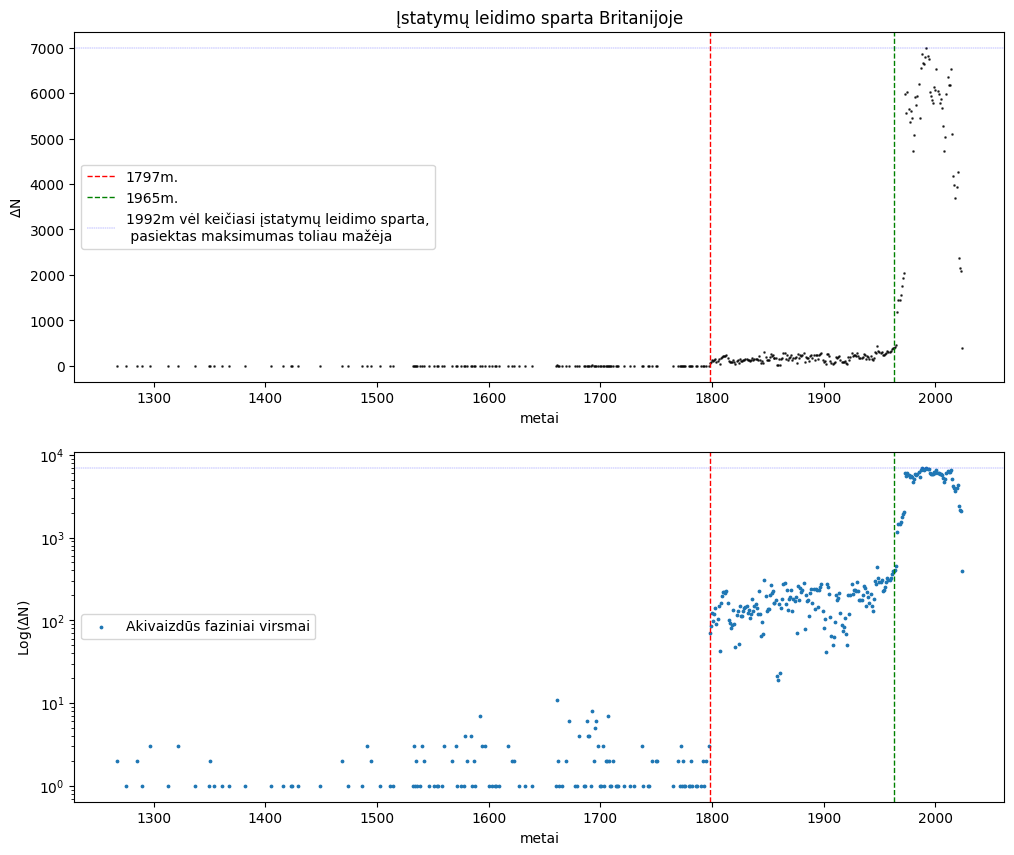

In [85]:
#
fig, [ax,ax2] = plt.subplots(2,1, figsize=(12,10))
#ax.scatter(metai, įstatymai)
ax.scatter(metai_uk, įstatymai_uk, alpha = 0.7, color='black', s = 0.8)
              
#129    1797 (3)    1797    3
#128    1798 (71)   1798    71
#127    1799 (86)   1799    86
#126    1800 (122)  1800    122

ax.set_ylabel('$\Delta$N')
ax.set_xlabel('metai')
ax.set_title('Įstatymų leidimo sparta Britanijoje');

#ax[0].scatter(metai[131], įstatymai_uk[131])
 
        # Plotting a vertical line for the person's value in the column.
ax.axvline(metai_uk[131], color='red',\
linestyle='dashed', linewidth=1,\
label = "1797m.")

ax.axvline(metai_uk[297], color='green',\
linestyle='dashed', linewidth=1,\
label = "1965m.")

ax.axhline(7000, color='blue', alpha = 0.6,\
linestyle='dashed', linewidth=0.3,\
label = "1992m vėl keičiasi įstatymų leidimo sparta,\n pasiektas maksimumas toliau mažėja")

ax.legend();





#fig, ax = plt.subplots(figsize=(12,5))
#ax.scatter(metai, įstatymai)
ax2.scatter(metai_uk, įstatymai_uk,\
           label='Akivaizdūs faziniai virsmai',\
           s = 3)
ax2.set_ylabel('Log($\Delta$N)')
ax2.set_xlabel('metai')
#ax.set_title('Įstatymų kiekis Britanijoje\n Akivaizdus faziniai virsmai');
ax2.set_yscale('log')

ax2.axvline(metai_uk[131], color='red',\
linestyle='dashed', linewidth=1)

ax2.axvline(metai_uk[297], color='green',\
linestyle='dashed', linewidth=1)

ax2.axhline(7000, color='blue', alpha = 0.6,\
linestyle='dashed', linewidth=0.3)


ax2.legend();



**Kas įvyko 1797-1798 metais?**



 <img src="gobrr.jpg" width="400" align="center" />

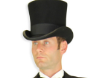

<img src="police.webp" width="400" align="center" />

Palygingime Anglijos populiacija ir įstatymų skaičių
------------------


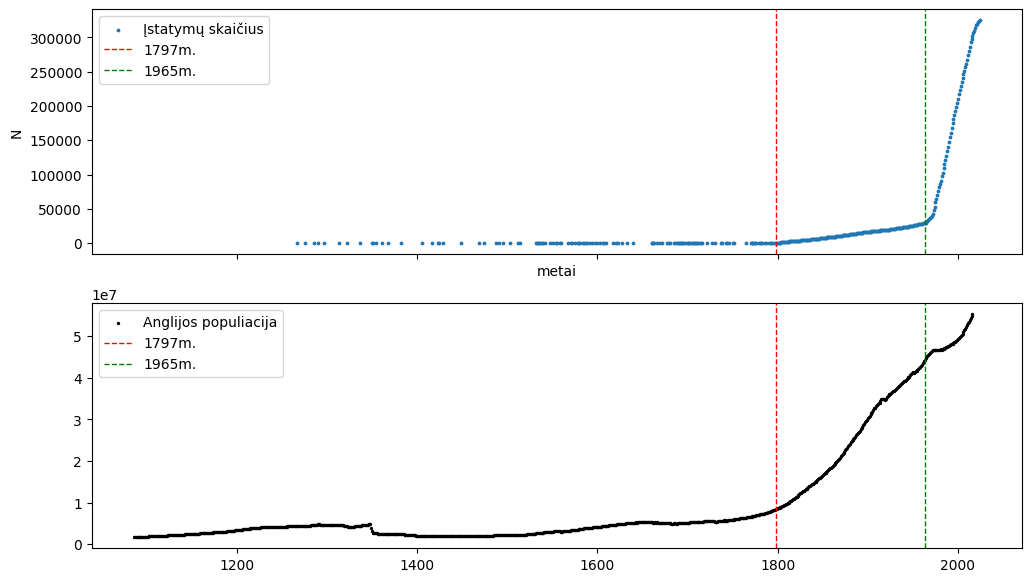

In [111]:
#
fig, [ax,ax2] = plt.subplots(2,1, figsize=(12,7), sharex=True)

#ax.scatter(metai, įstatymai)
ax.scatter(metai_uk, visi_įstatymai_uk, label='Įstatymų skaičius', s = 3)
ax.set_ylabel('N')
ax.set_xlabel('metai')

ax.axvline(metai_uk[131], color='red',\
linestyle='dashed', linewidth=1,\
label = "1797m.")

ax.axvline(metai_uk[297], color='green',\
linestyle='dashed', linewidth=1,\
label = "1965m.")
ax.legend();

ax2.scatter(metai_pop, uk_pop, color='black', label="Anglijos populiacija", s = 2)



ax2.axvline(metai_uk[131], color='red',\
linestyle='dashed', linewidth=1,\
label = "1797m.")

ax2.axvline(metai_uk[297], color='green',\
linestyle='dashed', linewidth=1,\
label = "1965m.")


ax2.legend();



**Britanijos trys periodai**

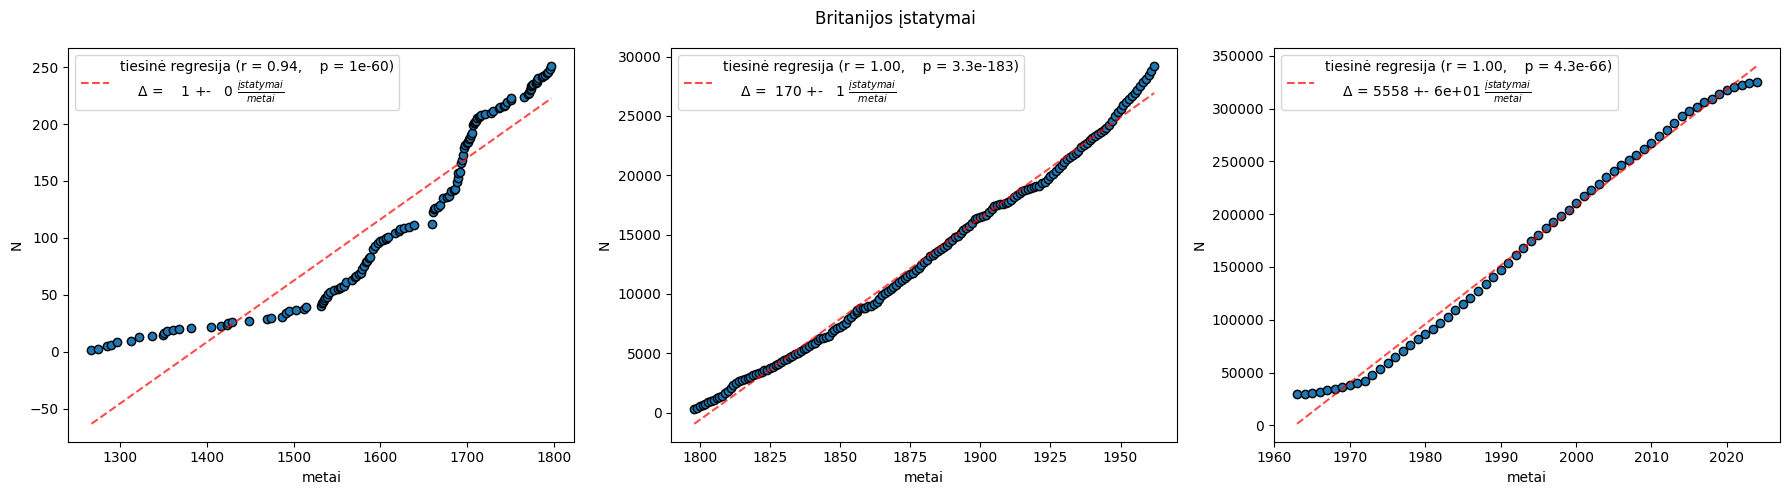

In [341]:
#
fig, [ax0, ax1, ax2] = plt.subplots(1,3, figsize=(18,5), layout="tight")
fig.suptitle('Britanijos įstatymai');



DamaPlot(metai_uk[:131], visi_įstatymai_uk[:131], ax0 )



DamaPlot(metai_uk[131:297], visi_įstatymai_uk[131:297], ax1 )


DamaPlot(metai_uk[297:], visi_įstatymai_uk[297:], ax2 )


for ax in [ax0, ax1, ax2]:
    ax.set_ylabel('N')
    ax.set_xlabel('metai')
    ax.legend();


# Lietuva vs Anglija

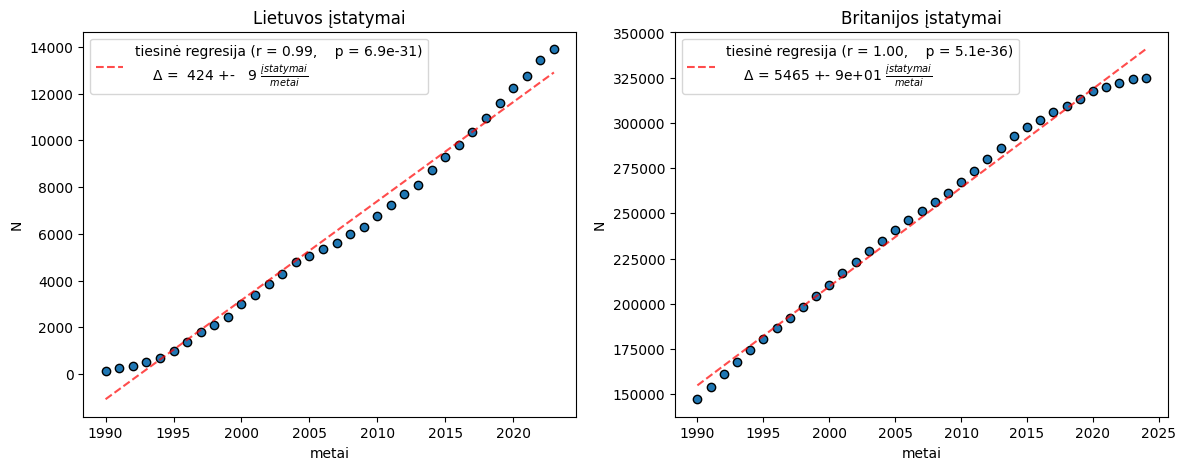

In [342]:
#
fig, [ax,ax2] = plt.subplots(1,2, figsize=(14,5))
#ax.scatter(metai, įstatymai)

DamaPlot(metai, visi_įstatymai, ax)
ax.set_ylabel('N')
ax.set_xlabel('metai')
ax.set_title('Lietuvos įstatymai');
ax.legend();


DamaPlot(metai_uk[324:], visi_įstatymai_uk[324:], ax2 )
ax2.set_ylabel('N')
ax2.set_xlabel('metai')
ax2.set_title('Britanijos įstatymai');
ax2.legend();




Išvados
-----------

- Teisės dokumentų augimas auga! 

<img src="golaw.png" width="1400" align="center" />

Spekuliacijos
-------------


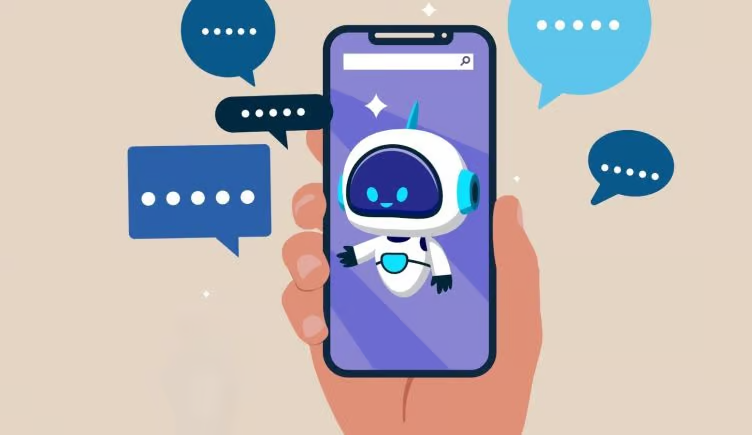

Duomenų rinkimas
------

<img src="vargas.png" width="1400" align="center" />

<img src="vargas3.png" width="1400" align="center" />

# DI europos sąjungos aktas



- Jau antri metai domiuosi DI saugumo tematika. 
- Galiu šiek tiek srityje kurioj nusimanau papasakoti apie teisės dokumento kurimą ir įgyvendinimą.



- vakar dalyvavau konferencijoje
- buvo pristatytas EU legalumo aktas rūpinantis DI saugumu
- T.y. reguliuojantis DI saugumą.

- Ginčas tarp verslo ir etikos.

- Startupo CEO, jau dabar reguliacijom išleidžiama 50% žmogiškųjų išteklių.


    - rizikuodami galime būti labiau konkurencingi,






vienintelis oficialius raginimas
-------------------------------

<img src="raginimas_KGB.png" width="1400" align="center" />